In [23]:
%%capture
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install scikit-learn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import math

### Create dummy data

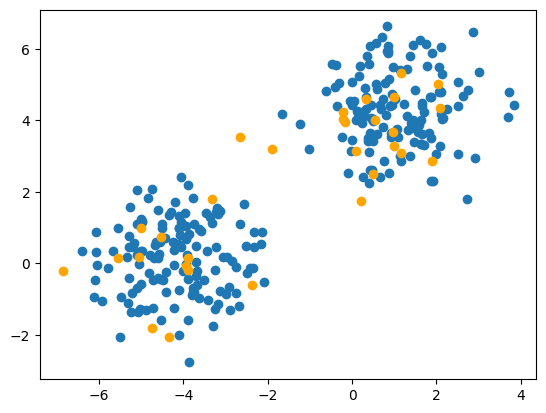

In [156]:
X, Y = make_blobs(n_samples=300, centers=2, n_features=2, random_state=3)

# Split into train/val set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.scatter(X_test[:, 0], X_test[:, 1], c='orange')
plt.show()

# add X_0 to all sets
ones = np.zeros((len(X_train), 1))
X_train = np.hstack((ones, X_train))
ones = np.zeros((len(X_test), 1))
X_test = np.hstack((ones, X_test))

### Logistic Regression

Loss: -547.1656119800776


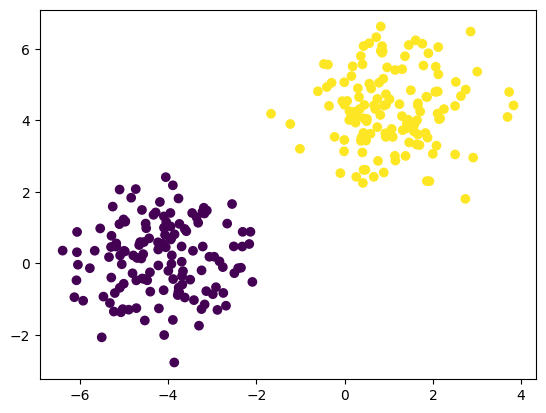

Loss: -167.88515274597052


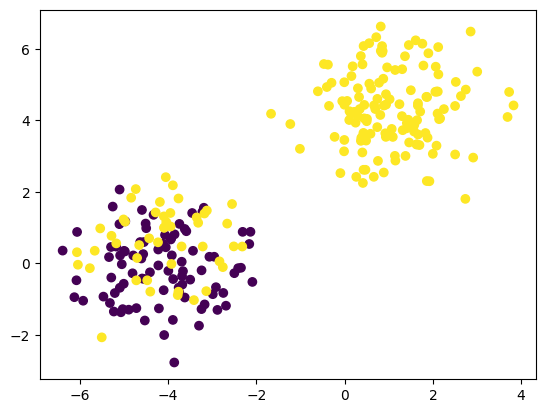

Loss: -78.34277703975076


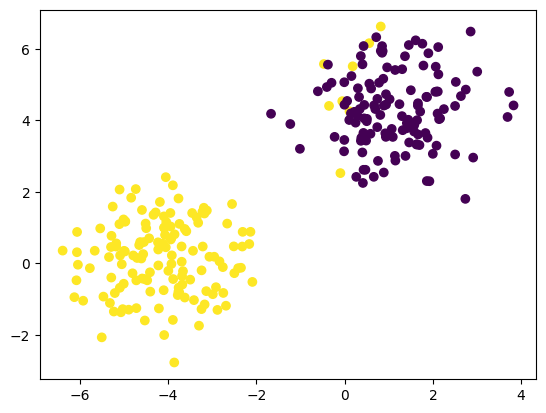

Loss: -50.48819751209379


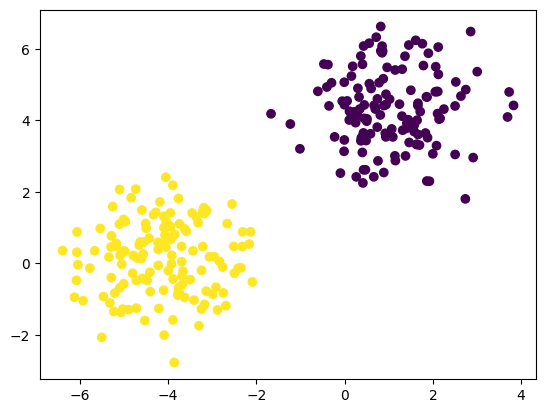

Loss: -37.54667853223316


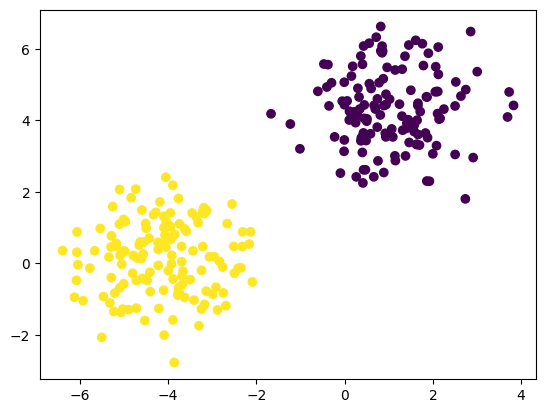

Loss: -30.101070318028523
Loss: -25.25466590638823
Loss: -21.839918364343337
Loss: -19.298042030914036
Loss: -17.328246360042197
Loss: -15.754198873420595
Loss: -14.465618758202968
Loss: -13.389944294232148
Loss: -12.477440262917664
Loss: -11.692851729896649
Loss: -11.010475003161757
Loss: -10.411116815043895
Loss: -9.88014780555838
Loss: -9.40621641258694
Loss: -8.980375455019043
Loss: -8.59547455284498
Loss: -8.245728408857842
Loss: -7.9264042055118304
Loss: -7.6335913953505266
Loss: -7.364029569476381
Loss: -7.114977967200923
Loss: -6.884115306363192
Loss: -6.669462004128536
Loss: -6.469319146347574
Loss: -6.282220134169909
Loss: -6.1068920313914
Loss: -5.942224410036527
Loss: -5.787244046145214
Loss: -5.641094219783178
Loss: -5.503017668137592
Loss: -5.37234245907244
Loss: -5.248470216059729
Loss: -5.130866248938948
Loss: -5.019051239079
Loss: -4.912594199817987
Loss: -4.811106489017232
Loss: -4.714236694198283
Loss: -4.621666244979619
Loss: -4.533105634590136
Loss: -4.448291153746

In [165]:
def sigmoid_function(z):
    return 1/(1+math.exp(-z))

def calc_hypothesis(theta, x):
    hypothesis = theta.T @ x
    sigmoid_hypothesis = sigmoid_function(hypothesis)
    return sigmoid_hypothesis

def calc_loss_function(X, Y, theta):
    loss = 0
    for x,y in zip(X,Y):
        h_x = calc_hypothesis(theta, x)
        if (h_x == 1):
            h_x = 1- 0.000000001
        loss += y * math.log(h_x) + (1-y) * math.log(1-h_x)
    return loss

def update_parameters(theta, learning_rate, y, h_x, x):
    x = np.reshape(x, theta.shape)
    return theta + learning_rate * (y - h_x) * x


theta = np.ones(3).reshape(3, 1) # learnable parameters
learning_rate = 0.001
iters = 100

# holds hypothesis for each data point to be plotted
H_train = np.zeros([Y_train.shape[0], 1], dtype=Y_train.dtype)


# Run Logistic Regression
for iter in range(iters):
    for i, (x, y) in enumerate(zip(X_train, Y_train)):

        h_x = calc_hypothesis(theta, x)

        theta = update_parameters(theta, learning_rate, y, h_x, x)

        H_train[i][0] = round(h_x)
    loss = calc_loss_function(X_train, Y_train, theta)
    print(f"Loss: {loss}")
    if iter < 5:
        plt.scatter(X_train[:, 1], X_train[:, 2], c=H_train[:, 0])
        plt.show()


### Test

Loss: -1.3456458919976968


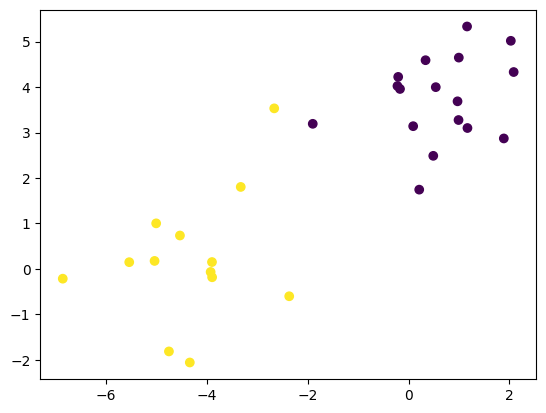

In [167]:
# holds hypothesis for each data point
H_test = np.zeros([Y_test.shape[0], 1], dtype=Y_test.dtype)

# Use computed thetas on test data set
for i, (x,y) in enumerate(zip(X_test, Y_test)):
    h_x = calc_hypothesis(theta, x)
    H_test[i][0] = round(h_x)

loss = calc_loss_function(X_test, Y_test, theta)
print(f"Loss: {loss}")

plt.scatter(X_test[:, 1], X_test[:, 2], c=H_test[:, 0])
plt.show()